<a href="https://colab.research.google.com/github/mksharsh568/Data-science-project/blob/main/time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Cash_Collection.csv to Cash_Collection.csv


In [ ]:
import io
data = io.BytesIO(uploaded['Cash_Collection.csv']) 

In [ ]:
  

import pandas as pd   
df = pd.read_csv(data)

df.head()

,Month,Amount
0,16-Jan,62257954.15
1,16-Feb,78691123.42
2,16-Mar,83327061.75
3,16-Apr,79716030.34
4,16-May,81918717.92


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   35 non-null     object 
 1   Amount  35 non-null     float64
dtypes: float64(1), object(1)
memory usage: 688.0+ bytes


In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

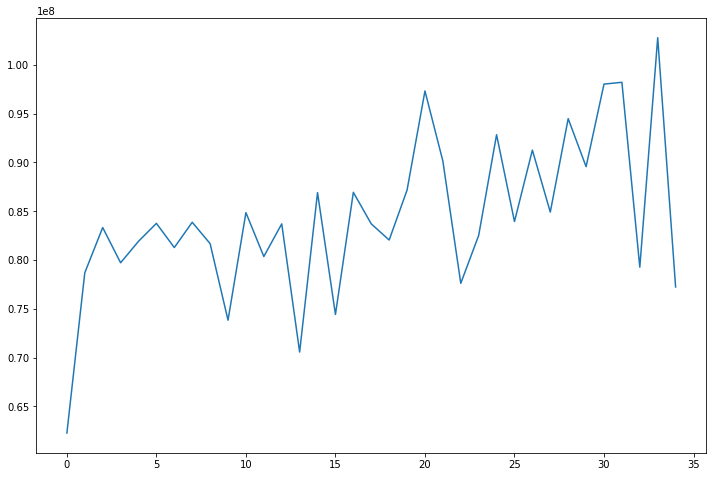

In [ ]:
df['Amount'].plot(figsize=(12,8))

In [ ]:
result = adfuller(df.Amount.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.099870
p-value: 0.026563


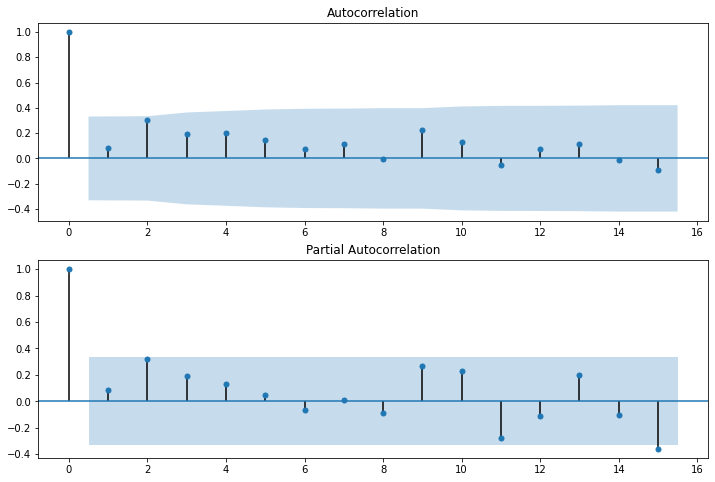

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Amount'].dropna(),lags=15,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Amount'].dropna(),lags=15,ax=ax2)

In [ ]:
 df["diff_1"] = df["Amount"].diff(periods=1)
 df["diff_2"] = df["Amount"].diff(periods=2)
 df["diff_3"] = df["Amount"].diff(periods=3)


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
#model=ARIMA(df.Amount,order=(2,0,2))
model = sm.tsa.statespace.SARIMAX(df.diff_1, order=(2,1,2),seasonal_order = (2,1,2,12))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             diff_1   No. Observations:                   35
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -383.767
Date:                            Sat, 17 Dec 2022   AIC                            785.533
Time:                                    05:53:04   BIC                            795.353
Sample:                                         0   HQIC                           787.847
                                             - 35                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4722      0.720     -0.656      0.512      -1.883       0.939
ar.L2         -0.0939      0.767     -0.122      0.903      -1.597       1.409
ma.L1         -1.8159      0.740     -2.454      0.014      -3.266      -0.365
ma.L2          0.8605      0.771      1.116      0.265      -0.651       2.372
ar.S.L12      -0.6203   1.89e+04  -3.27e-05      1.000   -3.71e+04    3.71e+04
ar.S.L24      -0.2485   3079.147  -8.07e-05      1.000   -6035.267    6034.770
ma.S.L12      -0.0718   1.89e+04   -3.8e-06      1.000    -3.7e+04     3.7e+04
ma.S.L24       0.0050   1.08e+04   4.65e-07      1.000   -2.12e+04    2.12e+04
sigma2      1.208e+14   8.03e-06   1.51e+19      0.000    1.21e+14    1.21e+14
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.11
Prob(Q):                              1.00   Prob(JB):                         0.95
Heteroskedasticity (H):               2.78   Skew:                            -0.15
Prob(H) (two-sided):                  0.20   Kurtosis:                         2.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.94e+34. Standard errors may be unstable.
"""

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
df['forecast'] = model_fit.predict(start = 20, end = 36, dynamic = True)
df.tail(6)

,Month,Amount,forecast
29,18-Jun,89569838.600,84329485.602
30,18-Jul,98036594.440,84323161.820
31,18-Aug,98221531.170,84320695.724
32,18-Sep,79263528.170,84319869.986
33,18-Oct,102796341.600,84319676.488
34,18-Nov,77233982.710,84319690.136


In [ ]:
df['forecast'] = model_fit.predict(start = 20, end = 36, dynamic = True)
df.tail(6)

,Month,Amount,forecast
29,18-Jun,89569838.600,84329485.602
30,18-Jul,98036594.440,84323161.820
31,18-Aug,98221531.170,84320695.724
32,18-Sep,79263528.170,84319869.986
33,18-Oct,102796341.600,84319676.488
34,18-Nov,77233982.710,84319690.136


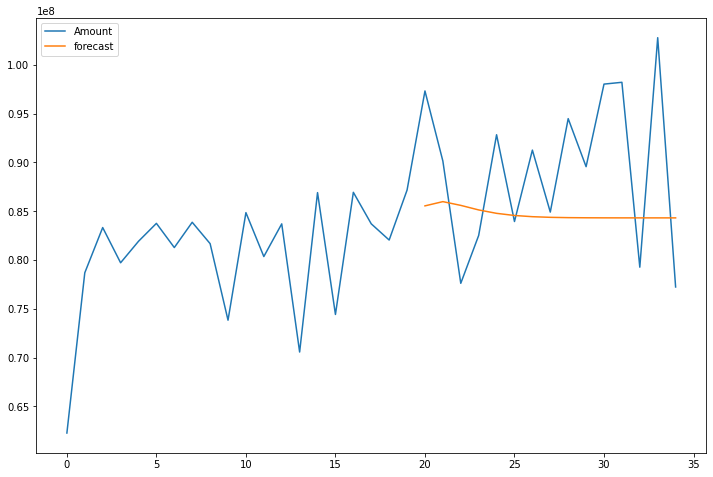

In [ ]:
df[['Amount','forecast']].plot(figsize = (12,8))